In [289]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [290]:
# loading the dataset
df = pd.read_csv("../data/Esophageal_Dataset.csv", index_col=0)
df

,patient_barcode,tissue_source_site,patient_id,bcr_patient_uuid,informed_consent_verified,icd_o_3_site,icd_o_3_histology,icd_10,tissue_prospective_collection_indicator,tissue_retrospective_collection_indicator,...,primary_pathology_lymph_node_examined_count,primary_pathology_number_of_lymphnodes_positive_by_he,primary_pathology_number_of_lymphnodes_positive_by_ihc,primary_pathology_planned_surgery_status,primary_pathology_treatment_prior_to_surgery,primary_pathology_residual_tumor,primary_pathology_karnofsky_performance_score,primary_pathology_eastern_cancer_oncology_group,primary_pathology_radiation_therapy,primary_pathology_postoperative_rx_tx
0,TCGA-2H-A9GF,2H,A9GF,0500F1A6-A528-43F3-B035-12D3B7C99C0F,YES,C15.5,8140/3,C15.5,NO,YES,...,8.0,7.0,0.0,NaN,NaN,R1,NaN,NaN,NO,NO
1,TCGA-2H-A9GG,2H,A9GG,70084008-697D-442D-8F74-C12F8F598570,YES,C15.5,8140/3,C15.5,NO,YES,...,19.0,4.0,0.0,NaN,NaN,R1,NaN,NaN,NO,NO
2,TCGA-2H-A9GH,2H,A9GH,606DC5B8-7625-42A6-A936-504EF25623A4,YES,C15.5,8140/3,C15.5,NO,YES,...,30.0,1.0,0.0,NaN,NaN,R0,NaN,NaN,NO,NO
3,TCGA-2H-A9GI,2H,A9GI,CEAF98F8-517E-457A-BF29-ACFE22893D49,YES,C15.5,8140/3,C15.5,NO,YES,...,8.0,4.0,0.0,NaN,NaN,R0,NaN,NaN,NO,NO
4,TCGA-2H-A9GJ,2H,A9GJ,EE47CD59-C8D8-4B1E-96DB-91C679E4106F,YES,C15.5,8140/3,C15.5,NO,YES,...,19.0,0.0,0.0,NaN,NaN,R0,NaN,NaN,NO,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,677b83fe-4dbd-410e-aea8-62d68a80f652,Z6,A8JD,B997D486-8C71-4926-9DF1-D2AFDAF2785F,YES,C15.9,8070/3,C15.9,YES,NO,...,19.0,0.0,0.0,NaN,NaN,R0,90.0,2.0,NaN,NaN
3996,a4faa9ff-b9a1-4a4c-9929-bb0154030067,Z6,A8JE,1116DDAE-76B0-48D6-869C-BE65D8B09D35,YES,C15.3,8070/3,C15.3,YES,NO,...,9.0,1.0,0.0,Surgery already performed,No Treatment,RX,80.0,2.0,NaN,NaN
3997,6bdc4fc8-8d76-4886-bf13-e282f4b1476b,Z6,A9VB,1C2837D4-BD2C-46F7-9E22-683B82A16350,YES,C15.5,8070/3,C15.5,YES,NO,...,NaN,NaN,NaN,NaN,NaN,R0,NaN,NaN,NO,NO
3998,d61e44e1-06ed-4849-85d7-3b360dd03721,Z6,AAPN,2659BB79-95F9-4476-A516-F3800536422D,YES,C15.5,8070/3,C15.5,YES,NO,...,11.0,0.0,NaN,NaN,NaN,R0,NaN,NaN,NO,NO


In [291]:
# removing columns where all the values are missing
# and where all the values are the same
non_unique_mask = df.nunique(dropna=False) == 1
df.drop(columns=df.columns[non_unique_mask], inplace=True)
df.dropna(axis=1, how="all", inplace=True)
df.shape[1]

73

In [292]:
# keeping only unique rows
df = df[~df.duplicated(keep=False)]

In [293]:
df["Age"] = df["days_to_birth"].abs() / 365.25
df["Death Age"] = (df["days_to_birth"].abs() - df["days_to_death"]) / 365.25

In [294]:
# combining form completion date to a single column
date_dict = {
    'year': df['year_of_form_completion'],
    'month': df['month_of_form_completion'],
    'day': df['day_of_form_completion']
}
df["date_of_form_completion"] = pd.to_datetime(date_dict)
df.drop(["year_of_form_completion", "month_of_form_completion", "day_of_form_completion"], inplace=True, axis=1)

In [295]:
true_cols = df.groupby("patient_id").nunique().max() != 1
df[true_cols[true_cols].index]

,patient_barcode,days_to_birth,height,weight,Age,Death Age
0,TCGA-2H-A9GF,-24487,183.0,95.0,67.041752,64.895277
1,TCGA-2H-A9GG,-24328,178.0,74.0,66.606434,64.936345
2,TCGA-2H-A9GH,-16197,183.0,91.0,44.344969,41.741273
3,TCGA-2H-A9GI,-25097,188.0,100.0,68.711841,67.520876
4,TCGA-2H-A9GJ,-21180,189.0,70.0,57.987680,53.111567
...,...,...,...,...,...,...
3995,677b83fe-4dbd-410e-aea8-62d68a80f652,-19505,169.0,67.0,53.401780,NaN
3996,a4faa9ff-b9a1-4a4c-9929-bb0154030067,-20861,165.0,65.0,57.114305,NaN
3997,6bdc4fc8-8d76-4886-bf13-e282f4b1476b,-19438,162.0,57.0,53.218344,NaN
3998,d61e44e1-06ed-4849-85d7-3b360dd03721,-20850,161.0,69.0,57.084189,NaN


Text(0.5, 1.0, 'Age distribution')

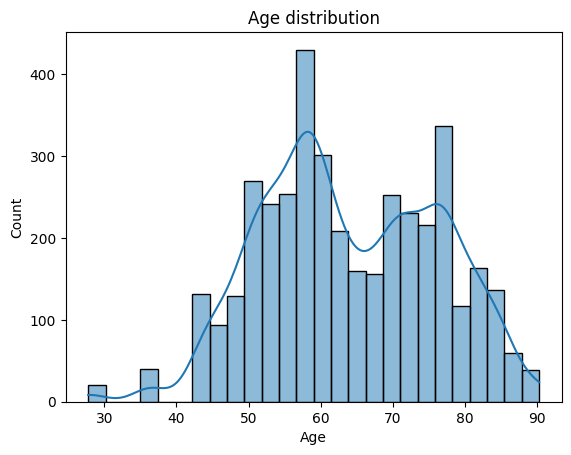

In [296]:
sns.histplot(df['Age'], kde=True,)
plt.title("Age distribution")

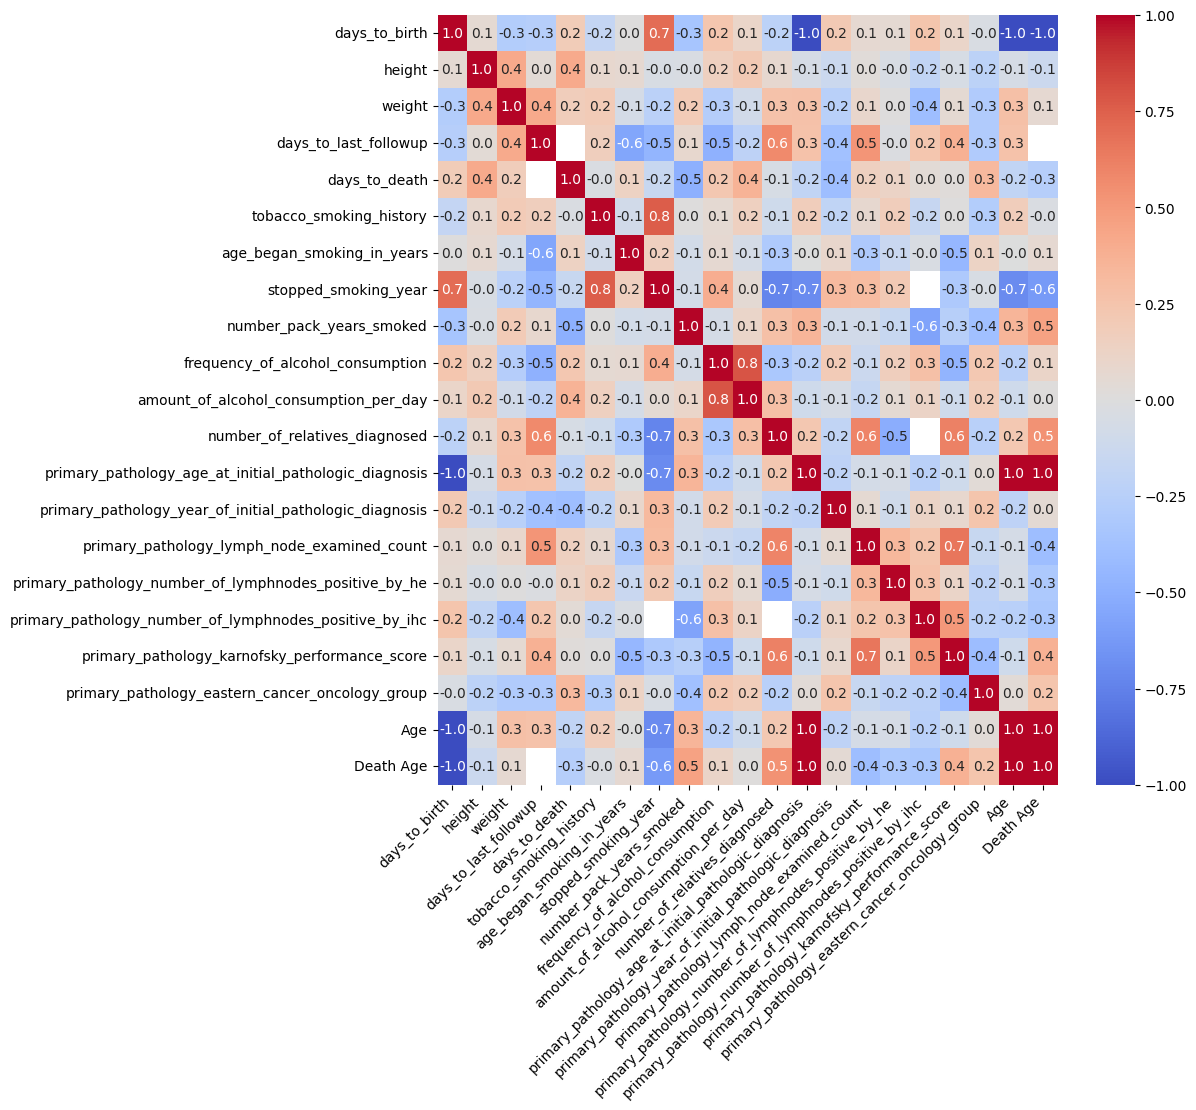

In [297]:
corr_matrix = df.select_dtypes("number").corr("spearman").dropna(how="all").dropna(axis=1, how="all")

plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, fmt=".1f")
plt.xticks(rotation=45, ha="right")
None

In [298]:
# Take the first row with least nans, since the values here look like they don't have much variation?
pdf = df.groupby("patient_id").apply(lambda g: g.loc[g.isna().sum(axis=1).idxmin()], include_groups=False)
pdf

,patient_barcode,tissue_source_site,bcr_patient_uuid,icd_o_3_site,icd_o_3_histology,icd_10,tissue_prospective_collection_indicator,tissue_retrospective_collection_indicator,days_to_birth,country_of_birth,...,primary_pathology_planned_surgery_status,primary_pathology_treatment_prior_to_surgery,primary_pathology_residual_tumor,primary_pathology_karnofsky_performance_score,primary_pathology_eastern_cancer_oncology_group,primary_pathology_radiation_therapy,primary_pathology_postoperative_rx_tx,Age,Death Age,date_of_form_completion
patient_id,,,,,,,,,,,,,,,,,,,,,
A3I8,TCGA-IG-A3I8,IG,7BF3F18B-A013-48D2-A743-26A57FDBE4C4,C15.9,8071/3,C15.9,YES,NO,-18786,Russia,...,NaN,NaN,R1,80.0,1.0,NaN,NaN,51.433265,NaN,2012-06-26
A3QL,TCGA-IG-A3QL,IG,0AC08ECF-4D70-48A4-9DFD-F44032551CB9,C15.5,8071/3,C15.5,YES,NO,-19755,Russia,...,NaN,NaN,R0,80.0,1.0,NO,NO,54.086242,NaN,2012-08-14
A3Y9,TCGA-IG-A3Y9,IG,4B8809A6-4AB3-4567-8623-37CE3FAA978C,C15.9,8070/3,C15.9,YES,NO,-26330,Russia,...,NaN,No Treatment,R0,80.0,1.0,NO,NO,72.087611,NaN,2012-09-25
A3YA,TCGA-IG-A3YA,IG,7AB6DE57-D659-47F1-A70F-1B67650E99D7,C15.5,8070/3,C15.5,YES,NO,-19567,Russia,...,NaN,NaN,R0,80.0,1.0,NaN,NaN,53.571526,NaN,2012-09-25
A3YB,TCGA-IG-A3YB,IG,A1A233EA-5DDA-4EEB-BD92-6667E8B3EF57,C15.5,8070/3,C15.5,YES,NO,-22316,Russia,...,NaN,NaN,R0,80.0,1.0,NaN,NaN,61.097878,NaN,2012-09-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AAAR,TCGA-X8-AAAR,X8,CAF9B681-AF70-4A6D-A871-C45926220DE5,C15.5,8140/3,C15.5,NO,YES,-25370,NaN,...,NaN,NaN,NaN,NaN,NaN,NO,NO,69.459274,NaN,2014-07-29
AAPN,TCGA-Z6-AAPN,Z6,2659BB79-95F9-4476-A516-F3800536422D,C15.5,8070/3,C15.5,YES,NO,-20926,Russia,...,NaN,NaN,R0,NaN,NaN,NO,NO,57.292266,NaN,2014-11-13
AASV,TCGA-V5-AASV,V5,89AAB5C2-9761-43BB-9053-EED42EE08969,C15.9,8070/3,C15.9,YES,NO,-24559,United States,...,NaN,NaN,R0,80.0,1.0,YES,YES,67.238877,NaN,2014-04-30


<Axes: xlabel='Age', ylabel='Count'>

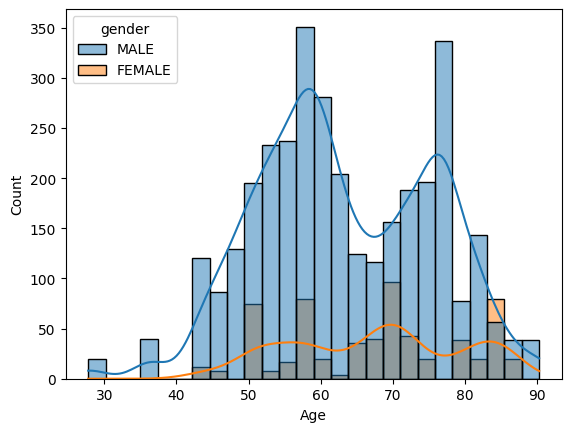

In [299]:
sns.histplot(df, x="Age", hue="gender", kde=True)

<Axes: xlabel='gender', ylabel='count'>

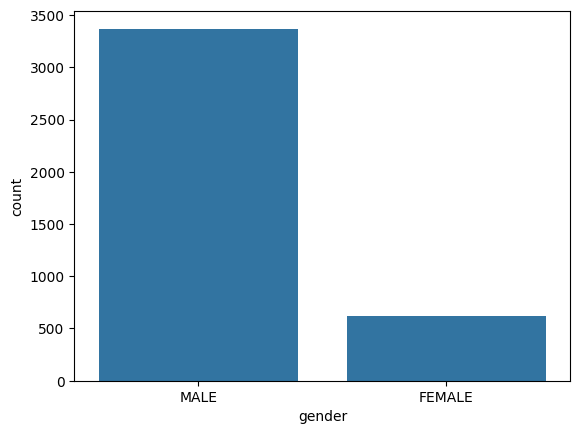

In [300]:
sns.barplot(df["gender"].value_counts())

<Axes: xlabel='gender'>

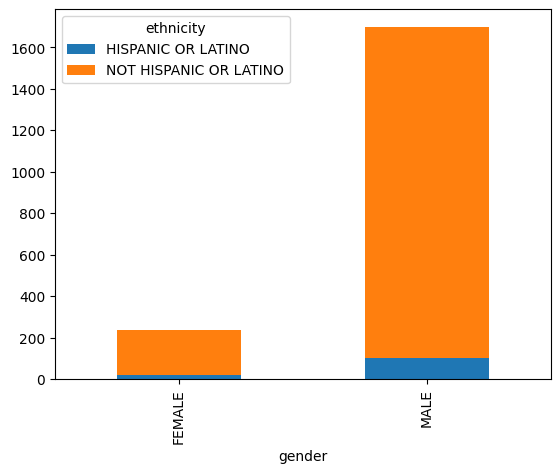

In [301]:
demographic_data = df.groupby(["gender", "ethnicity"]).size().unstack(fill_value=0)
demographic_data.plot.bar(stacked=True)

In [303]:
df["tobacco_smoking_history"] = df["tobacco_smoking_history"] - 1

In [ ]:
df["tobacco_smoking_history"] = df["tobacco_smoking_history"].replace(0.0, np.nan)

In [310]:
df["tobacco_smoking_history"] = df["tobacco_smoking_history"].replace({1.0: "current smoker", 2.0: "former smoker", 3.0: "non-smoker"})

<Axes: xlabel='tobacco_smoking_history', ylabel='age_began_smoking_in_years'>

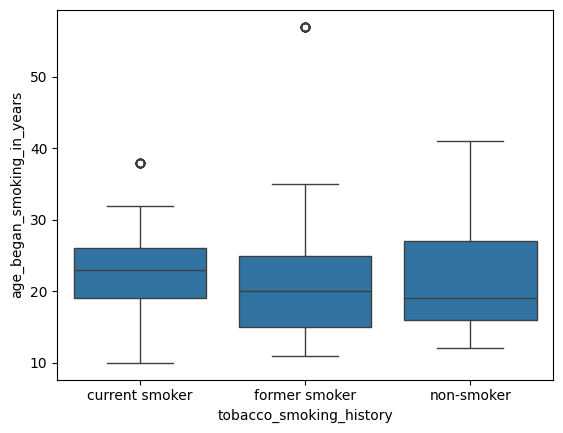

In [311]:
sns.boxplot(df, x="tobacco_smoking_history", y="age_began_smoking_in_years")

<Axes: xlabel='tobacco_smoking_history', ylabel='days_to_death'>

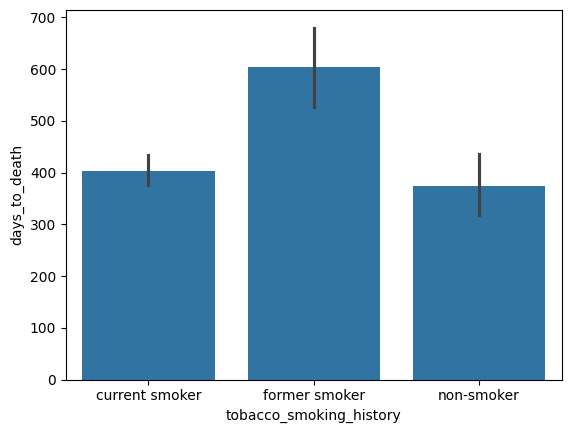

In [312]:
sns.barplot(data=df, x='tobacco_smoking_history', y='days_to_death')

<Axes: xlabel='ethnicity', ylabel='age_began_smoking_in_years'>

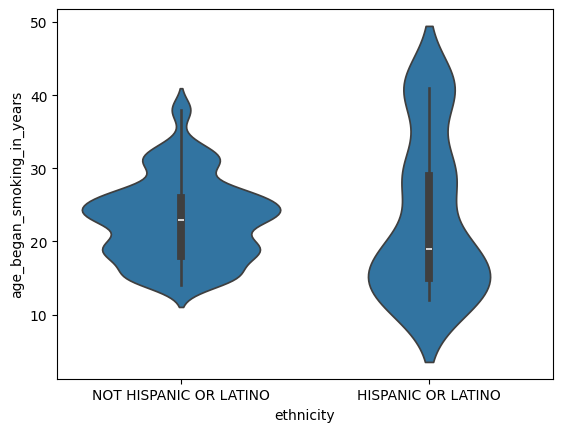

In [313]:
sns.violinplot(df, x="ethnicity", y="age_began_smoking_in_years")

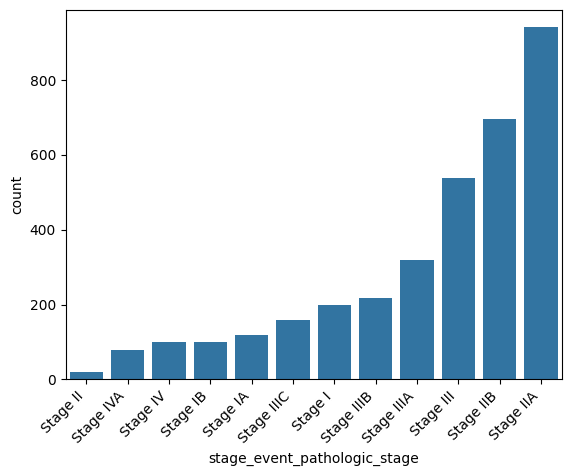

In [323]:
sns.countplot(data=df, x='stage_event_pathologic_stage', order=df['stage_event_pathologic_stage'].value_counts().sort_values().index)
plt.xticks(rotation=45, ha="right")
None

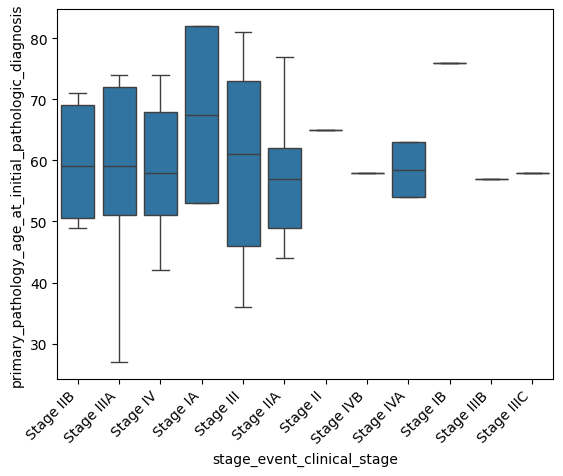

In [325]:
sns.boxplot(data=df, x='stage_event_clinical_stage', y='primary_pathology_age_at_initial_pathologic_diagnosis')
plt.xticks(rotation=45, ha="right")
None

<Axes: ylabel='count'>

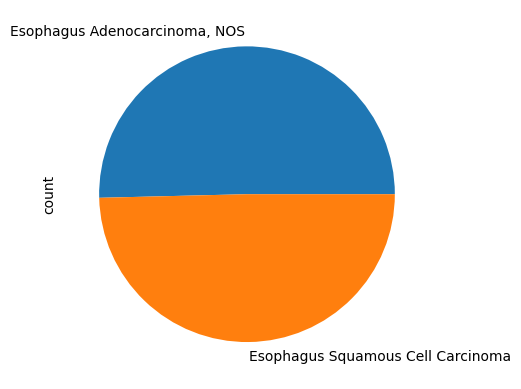

In [326]:
df["primary_pathology_histological_type"].value_counts().plot.pie()

<Axes: xlabel='primary_pathology_lymph_node_examined_count', ylabel='days_to_death'>

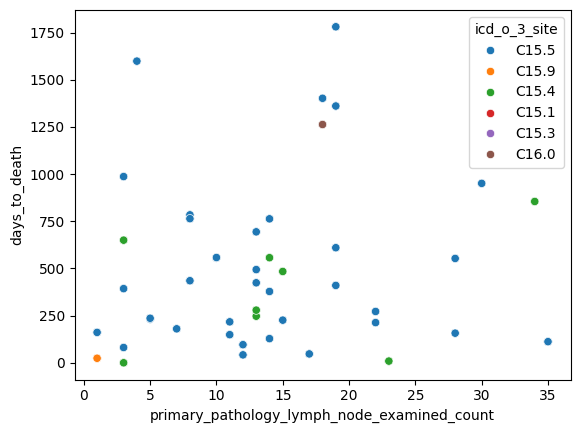

In [350]:
sns.scatterplot(df, x='primary_pathology_lymph_node_examined_count', 
                y='days_to_death', hue='icd_o_3_site')

<Axes: xlabel='height', ylabel='Count'>

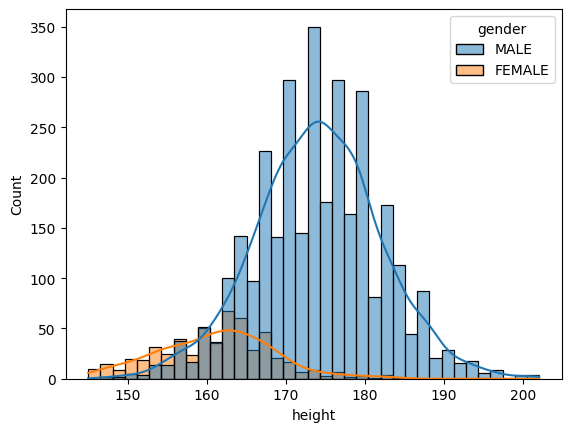

In [343]:
sns.histplot(df, x="height", hue="gender", kde=True)

<Axes: xlabel='weight', ylabel='Count'>

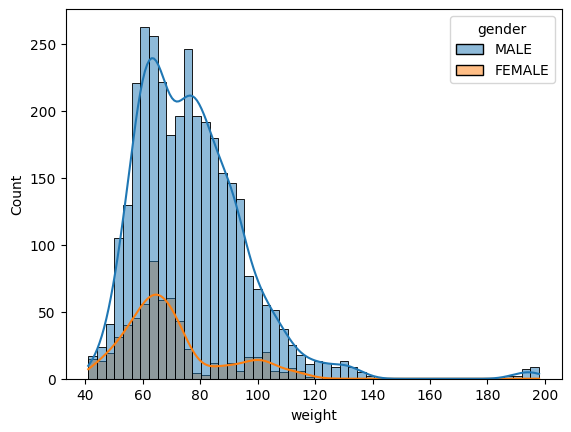

In [344]:
sns.histplot(df, x="weight", hue="gender", kde=True)

<Axes: xlabel='amount_of_alcohol_consumption_per_day', ylabel='number_pack_years_smoked'>

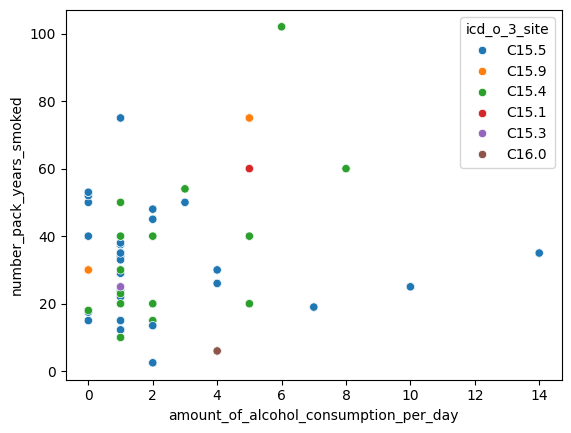

In [347]:
sns.scatterplot(df, x="amount_of_alcohol_consumption_per_day", y="number_pack_years_smoked", hue="icd_o_3_site")

<Axes: xlabel='primary_pathology_lymph_node_examined_count', ylabel='Count'>

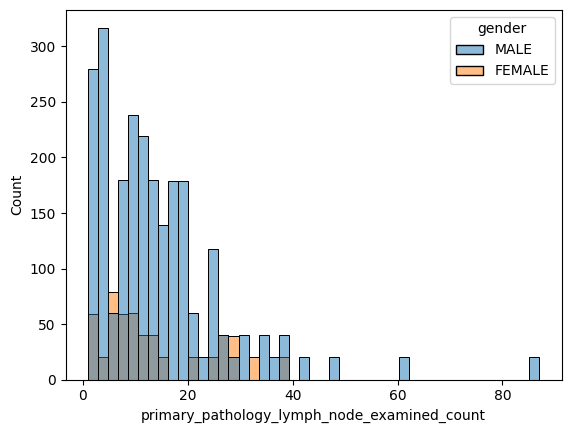

In [352]:
sns.histplot(df, x = "primary_pathology_lymph_node_examined_count", hue="gender")

<Axes: xlabel='height', ylabel='weight'>

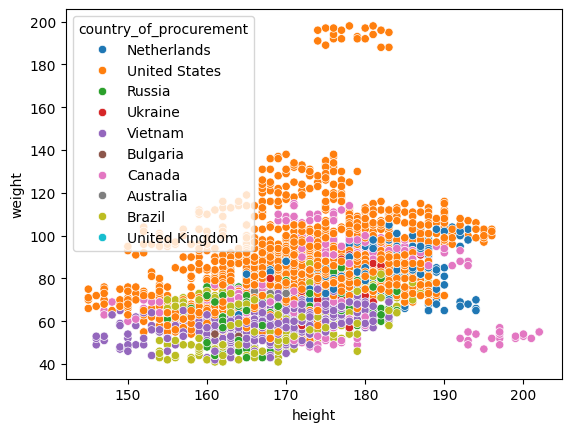

In [376]:
sns.scatterplot(df, x="height", y="weight", hue="country_of_procurement")

<Axes: xlabel='height', ylabel='weight'>

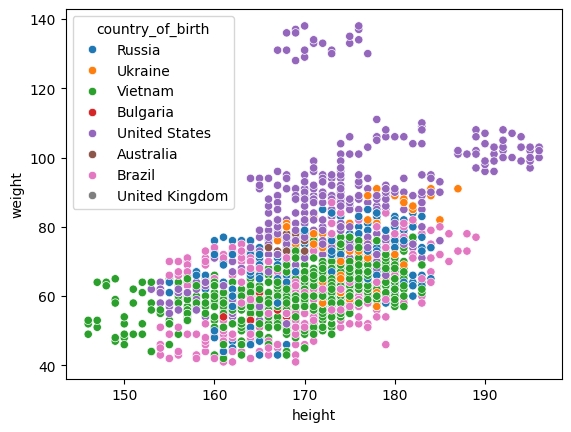

In [377]:
sns.scatterplot(df, x="height", y="weight", hue="country_of_birth")

<Axes: xlabel='reflux_history'>

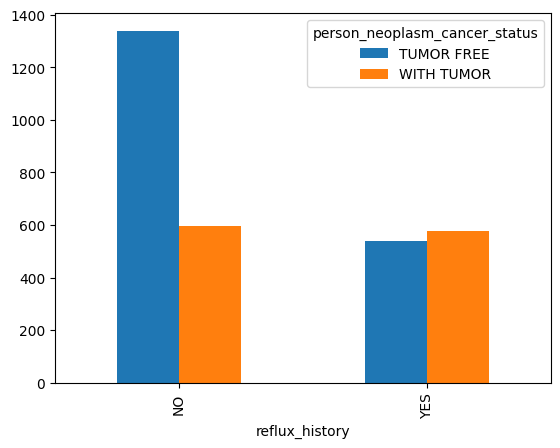

In [355]:
df.groupby(['reflux_history', 'person_neoplasm_cancer_status']).size().unstack(fill_value=0).plot.bar()

<Axes: xlabel='person_neoplasm_cancer_status'>

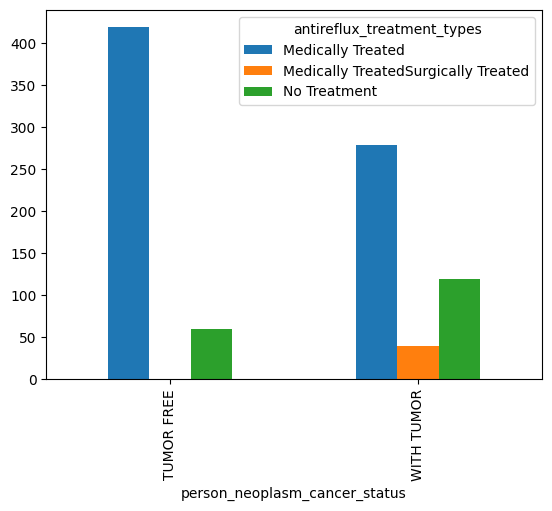

In [358]:
df.groupby(['person_neoplasm_cancer_status', 'antireflux_treatment_types']).size().unstack(fill_value=0).plot.bar()

<Axes: xlabel='ethnicity'>

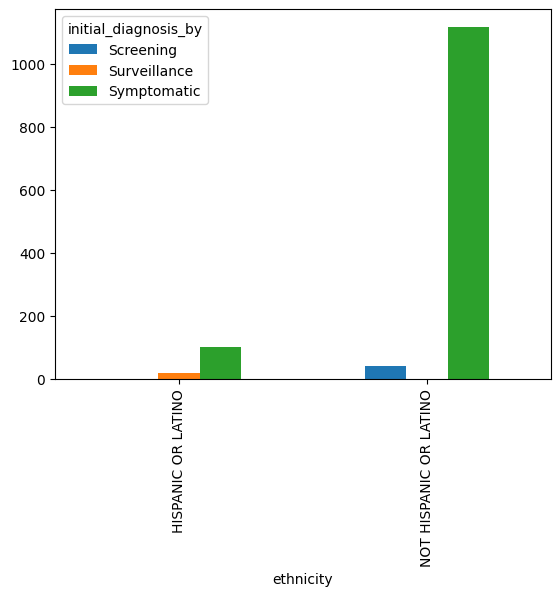

In [360]:
df.groupby(["ethnicity", "initial_diagnosis_by"]).size().unstack(fill_value=0).plot.bar()

<Axes: xlabel='stage_event_clinical_stage'>

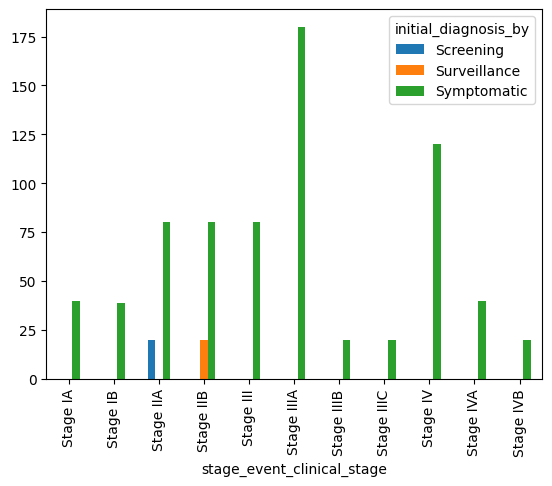

In [362]:
df.groupby(["stage_event_clinical_stage", "initial_diagnosis_by"]).size().unstack(fill_value=0).plot.bar()

<Axes: xlabel='stage_event_clinical_stage'>

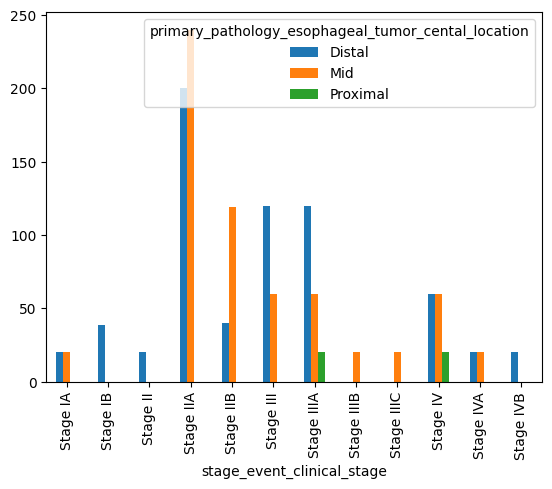

In [364]:
df.groupby(['stage_event_clinical_stage', 'primary_pathology_esophageal_tumor_cental_location']).size().unstack(fill_value=0).plot.bar()

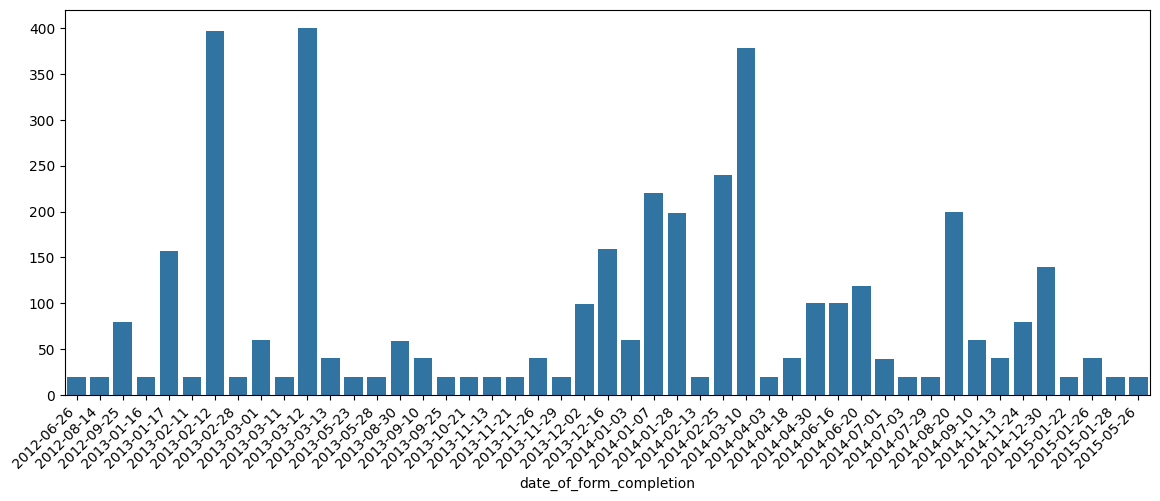

In [374]:
plt.figure(figsize=(14, 5))
sns.barplot(df.groupby("date_of_form_completion").size())
plt.xticks(rotation=45, ha="right")
None

In [379]:
table = pd.crosstab(
    df['tissue_retrospective_collection_indicator'],
    df['tissue_prospective_collection_indicator']
)
table

tissue_prospective_collection_indicator,NO,YES
tissue_retrospective_collection_indicator,,
NO,0,1577
YES,2368,0


In [365]:
[x for x in df.columns if "date" in x or "smok" in x]

['tobacco_smoking_history',
 'age_began_smoking_in_years',
 'stopped_smoking_year',
 'number_pack_years_smoked',
 'date_of_form_completion']